In [81]:
# Данные из файла Volgmed_2013.xls (конкретные данные выбрать в соответствии с вариантом) очистить от выбросов и пропусков,
# построить эмпирическую функцию распределения и гистограмму, аппроксимировать одним нормальным, затем смесями двух и трех нормальных распределений.
# Вывести плотности распределения полученных аппроксимаций вместе с гистограммой, а их функции распределения вместе с эмпирической функцией распределения.
# Для каждой аппроксимации посчитать среднее значение логарифмической функции правдоподобия. Затем
# удалить неположительные значения, прологарифмировать и повторить те же действия, что и с исходными данными.
# Вариант 4. Окружность грудной клетки на вдохе всех студентов первого курса.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

# Загрузка данных из файла Excel, начиная с 11 строки, т.к. до этого ненужная инфа
df = pd.read_excel("Volgmed_2013.xlsx", header = None, skiprows = 10)

# Добавление заголовков из 2 строки
headers = pd.read_excel("Volgmed_2013.xlsx", header = 0, nrows = 1).iloc[0].tolist()
df.columns = headers

df

,№ п/п,Пол,Год рождения,Факультет,Курс,Группа,Год поступления,Дата обследования,"Рост, см","Вес, кг",...,"Гибкость, см","Время 10 хлопков, с","Прыжок в длину с места, см","Челночный бег, с","Силовой норматив, ед","Бег 100 м, с","Бег 2-3 км, мин","Статическая выносливость, с","Задержка дыхания, с","Равновесие, с"
0,1.0,жен,1985.0,лечебный,1.0,1.0,2004,2002-05-01,166,61,...,16,6.8,148,25.8,40,18.7,10.3,120,35.0,60.0
1,NaN,жен,1985.0,лечебный,2.0,1.0,2004,2002-05-01,166,61,...,16,6.8,150,25.5,30,18.5,11.1,120,35.0,55.0
2,NaN,жен,1985.0,лечебный,3.0,1.0,2004,2002-05-01,166,61,...,17,6.6,140,25.9,42,20,11.1,NaN,NaN,NaN
3,2.0,жен,1985.0,лечебный,1.0,1.0,2004,2002-05-01,167,57,...,17,6,180,22.1,58,15,9.9,180,52.0,43.0
4,NaN,жен,1985.0,лечебный,2.0,1.0,2004,2002-05-01,167,57,...,18,6.2,180,22,64,15.4,9.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-05-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-05-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-05-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-05-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Фильтрация данных: числовые значения, курс = 1, без NaN
df = df[['Курс', 'Окружность грудной клетки на вдохе, см']].apply(pd.to_numeric, errors = 'coerce').dropna()
df = df[df['Курс'] == 1].drop(columns = 'Курс')

df

,"Окружность грудной клетки на вдохе, см"
0,91.0
3,89.0
6,88.0
9,85.0
12,94.0
...,...
4079,94.0
4081,92.0
4083,90.0
4085,94.0


In [83]:
# Очистка данных от выбросов
Q1 = df['Окружность грудной клетки на вдохе, см'].quantile(0.25)
Q3 = df['Окружность грудной клетки на вдохе, см'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df['Окружность грудной клетки на вдохе, см'] < lower_bound) | (df['Окружность грудной клетки на вдохе, см'] > upper_bound))]

df

,"Окружность грудной клетки на вдохе, см"
0,91.0
3,89.0
6,88.0
9,85.0
12,94.0
...,...
4079,94.0
4081,92.0
4083,90.0
4085,94.0


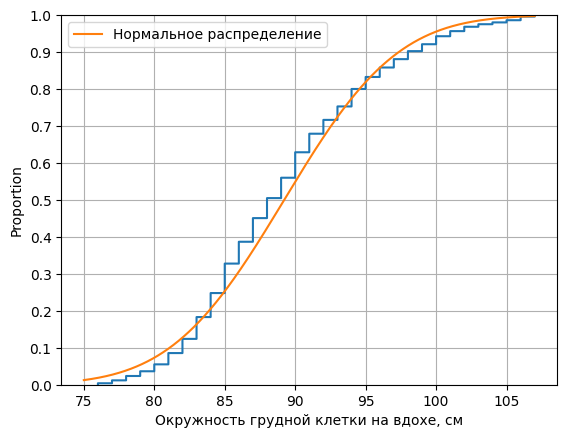

In [84]:
# Эмпирическая функция распределения
ax = sns.ecdfplot(df['Окружность грудной клетки на вдохе, см'])
ax.axes.set_yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
ax.grid()

X = np.linspace(75, np.max(df), 2000)
Y = norm.cdf(X, np.mean(df), np.std(df))
plt.plot(X, Y, label = 'Нормальное распределение')
plt.legend()

plt.show()

<Axes: xlabel='Окружность грудной клетки на вдохе, см', ylabel='Density'>

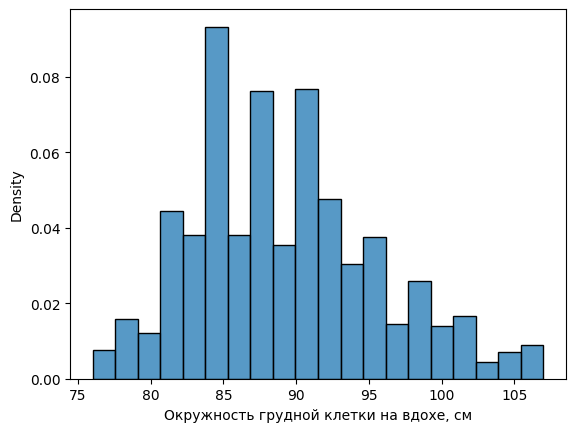

In [85]:
# Гистограмма
sns.histplot(df['Окружность грудной клетки на вдохе, см'], bins = 20, kde = False, stat = "density")

Гауссиан 1: mu = 8.9e+01, σ = 6.3, вес = 1.0


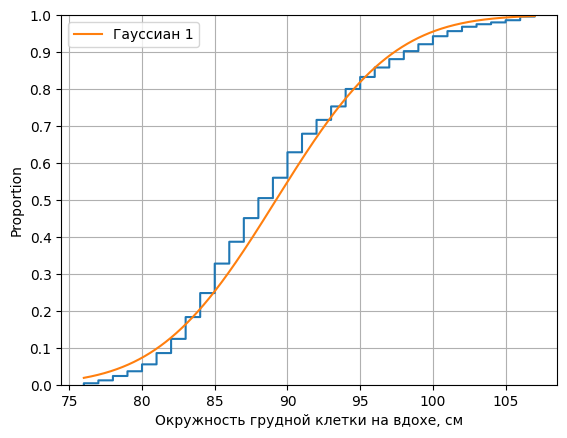

Среднее логарифмическое правдоподобие = -3.2662671930887135


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


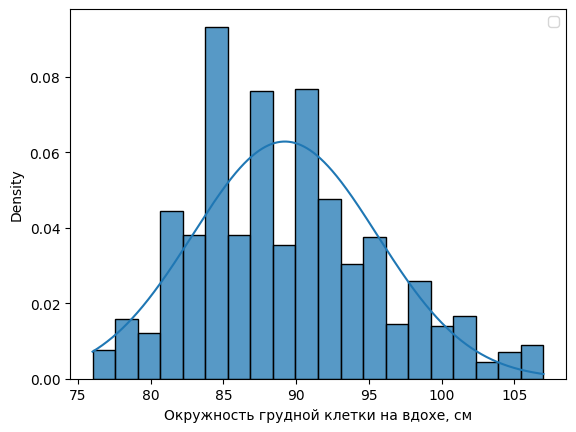

In [86]:
# 1 гауссиан
x = np.linspace(np.min(df), np.max(df), 2000)
gmm = GaussianMixture(n_components = 1, tol = 0.000001)
gmm.fit(np.expand_dims(df['Окружность грудной клетки на вдохе, см'], 1))
Gaussian_nr = 1

ax = sns.ecdfplot(df['Окружность грудной клетки на вдохе, см'])
ax.axes.set_yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
ax.grid()

for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Гауссиан {:}: mu = {:.2}, σ = {:.2}, вес = {:.2}'.format(Gaussian_nr, mu, sd, p))
    plt.plot(x, stats.norm(mu, sd).cdf(x) * p, label = 'Гауссиан {:}'.format(Gaussian_nr))
    plt.legend()
    plt.show()
    Gaussian_nr += 1
print('Среднее логарифмическое правдоподобие =', gmm.score(np.expand_dims(df['Окружность грудной клетки на вдохе, см'], 1)))
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gmm_sum)
plt.legend()
sns.histplot(df['Окружность грудной клетки на вдохе, см'], bins = 20, kde = False, stat = "density")
plt.show()

Гауссиан 1: mu = 9.4e+01, σ = 5.7, вес = 0.44
Гауссиан 2: mu = 8.5e+01, σ = 3.8, вес = 0.56
Среднее логарифмическое правдоподобие = -3.2272190084527383


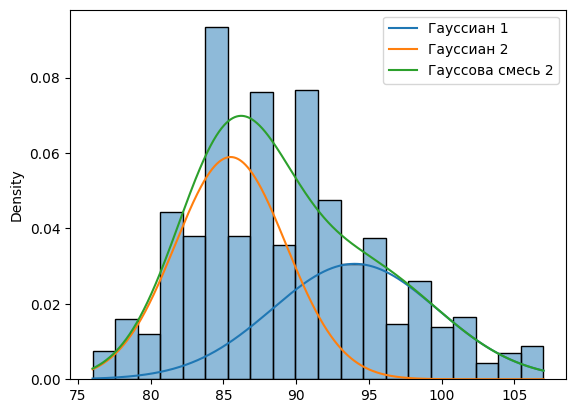

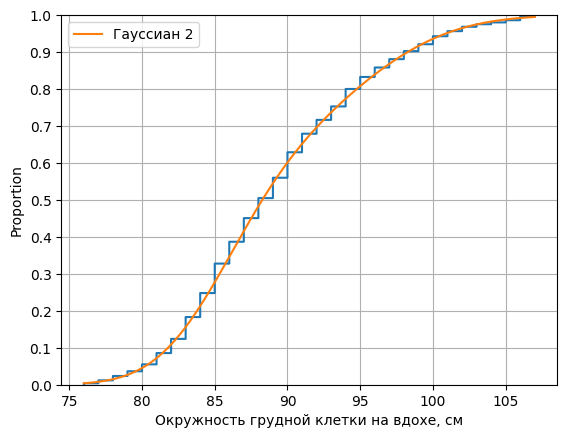

In [87]:
# 2 гауссиан
gmm = GaussianMixture(n_components = 2, tol = 0.000001)
gmm.fit(np.expand_dims(df['Окружность грудной клетки на вдохе, см'], 1))
Gaussian_nr = 1
params = []
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Гауссиан {:}: mu = {:.2}, σ = {:.2}, вес = {:.2}'.format(Gaussian_nr, mu, sd, p))
    params.append((mu, sd, p, Gaussian_nr))
    g_s = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, g_s, label='Гауссиан {:}'.format(Gaussian_nr))
    Gaussian_nr += 1
print('Среднее логарифмическое правдоподобие =', gmm.score(np.expand_dims(df['Окружность грудной клетки на вдохе, см'], 1)))
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gmm_sum, label = 'Гауссова смесь 2')
sns.histplot(df, bins = 20, kde = False, stat = "density")
plt.legend()
plt.show()

ax = sns.ecdfplot(df['Окружность грудной клетки на вдохе, см'])
ax.axes.set_yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
ax.grid()
Y = np.zeros(2000)
for param in params:
    Y = Y + stats.norm(param[0], param[1]).cdf(x) * param[2]
plt.plot(x, Y, label = 'Гауссиан {:}'.format(param[3]))
plt.legend()
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


Гауссиан 1: mu = 8.5e+01, σ = 3.4, вес = 0.5
Гауссиан 2: mu = 9.1e+01, σ = 3.6, вес = 0.35
Гауссиан 3: mu = 9.9e+01, σ = 3.9, вес = 0.15
Среднее логарифмическое правдоподобие = -3.2246699951877082


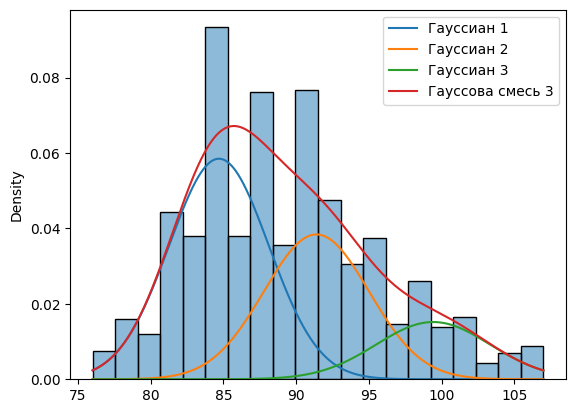

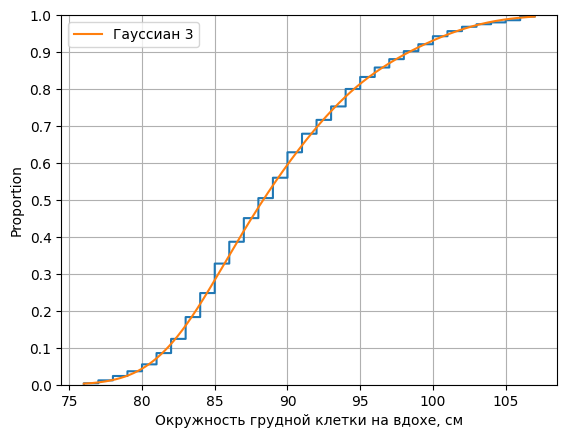

In [88]:
# 3 гауссиан
gmm = GaussianMixture(n_components = 3, tol = 0.000001,)
gmm.fit(np.expand_dims(df['Окружность грудной клетки на вдохе, см'], 1))
Gaussian_nr = 1
params = []
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Гауссиан {:}: mu = {:.2}, σ = {:.2}, вес = {:.2}'.format(Gaussian_nr, mu, sd, p))
    params.append((mu, sd, p, Gaussian_nr))
    g_s = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, g_s, label = 'Гауссиан {:}'.format(Gaussian_nr));
    Gaussian_nr += 1
print('Среднее логарифмическое правдоподобие =', gmm.score(np.expand_dims(df['Окружность грудной клетки на вдохе, см'], 1)))
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gmm_sum, label='Гауссова смесь 3')
sns.histplot(df, bins = 20, kde = False, stat = "density")
plt.legend()
plt.show()

ax = sns.ecdfplot(df['Окружность грудной клетки на вдохе, см'])
ax.axes.set_yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
ax.grid()
Y = np.zeros(2000)
for param in params:
    Y = Y + stats.norm(param[0], param[1]).cdf(x) * param[2]
plt.plot(x, Y, label = 'Гауссиан {:}'.format(param[3]))
plt.legend()
plt.show()

In [89]:
df['Окружность грудной клетки на вдохе, см'] = df['Окружность грудной клетки на вдохе, см'].astype(float)
df_log = np.log(df['Окружность грудной клетки на вдохе, см'])

C:\Users\admin\AppData\Local\Temp\ipykernel_14376\2326300693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Окружность грудной клетки на вдохе, см'] = df['Окружность грудной клетки на вдохе, см'].astype(float)


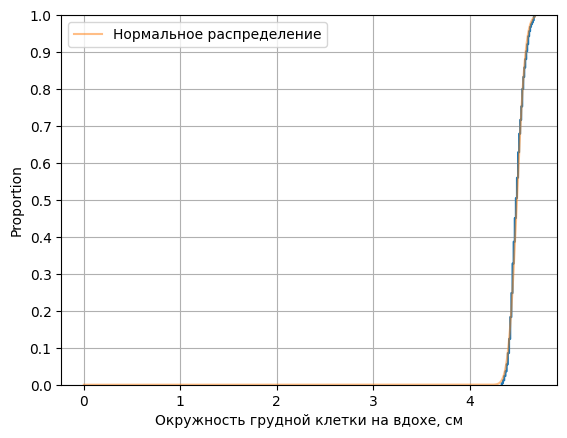

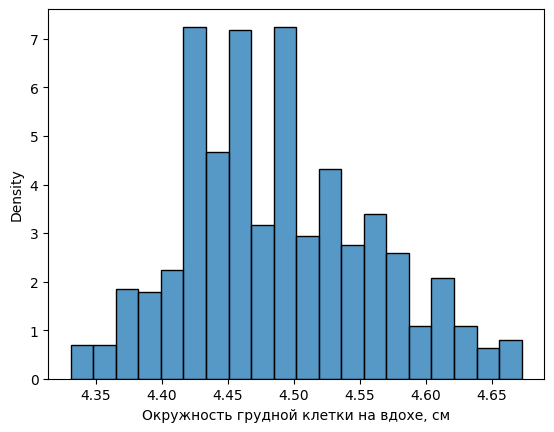

In [94]:
ax = sns.ecdfplot(df_log)
ax.axes.set_yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
ax.grid()
X = np.linspace(0, np.max(df_log), 2000)
Y = norm.cdf(X, np.mean(df_log), np.std(df_log))
plt.plot(X,Y, label = 'Нормальное распределение', alpha = 0.5)
plt.legend()
plt.show()
sns.histplot(df_log, bins = 20, kde = False, stat = "density")

plt.show()

Гауссиан 1: mu = 4.5, σ = 0.07, вес = 1.0
Среднее логарифмическое правдоподобие = 1.2380627014524366


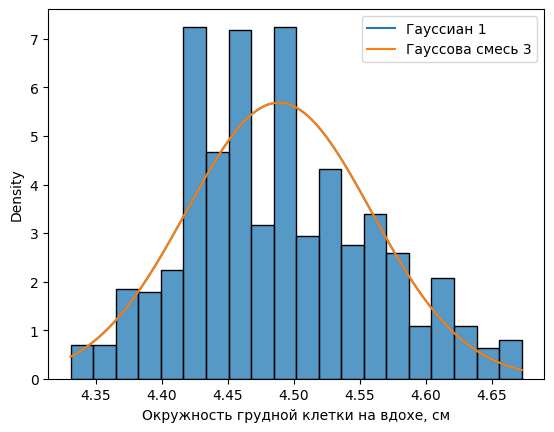

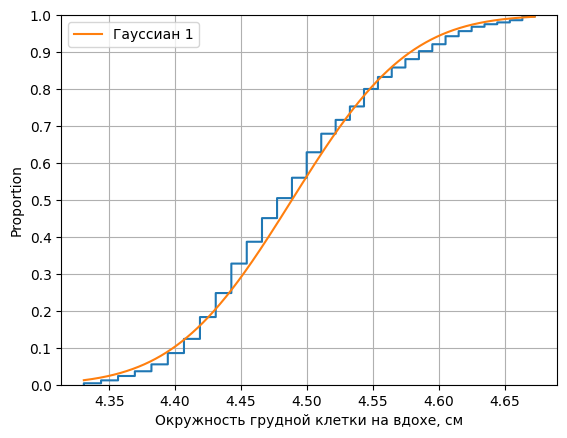

In [91]:
x = np.linspace(np.min(df_log), np.max(df_log), 2000)
gmm = GaussianMixture(n_components = 1, tol = 0.000001,)
gmm.fit(np.expand_dims(df_log, 1))
Gaussian_nr = 1
params = []
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Гауссиан {:}: mu = {:.2}, σ = {:.2}, вес = {:.2}'.format(Gaussian_nr, mu, sd, p))
    params.append((mu, sd, p, Gaussian_nr))
    g_s = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, g_s, label='Гауссиан {:}'.format(Gaussian_nr));
    Gaussian_nr += 1
print('Среднее логарифмическое правдоподобие =', gmm.score(np.expand_dims(df_log, 1)))
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gmm_sum, label = 'Гауссова смесь 3')
sns.histplot(df_log, bins = 20, kde = False, stat = "density")
plt.legend()
plt.show()

ax = sns.ecdfplot(df_log)
ax.axes.set_yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
ax.grid()
Y = np.zeros(2000)
for param in params:
    Y = Y + stats.norm(param[0], param[1]).cdf(x) * param[2]
plt.plot(x, Y, label = 'Гауссиан {:}'.format(param[3]))
plt.legend()
plt.show()

Гауссиан 1: mu = 4.5, σ = 0.057, вес = 0.4
Гауссиан 2: mu = 4.4, σ = 0.046, вес = 0.6
Среднее логарифмическое правдоподобие = 1.261588531872984


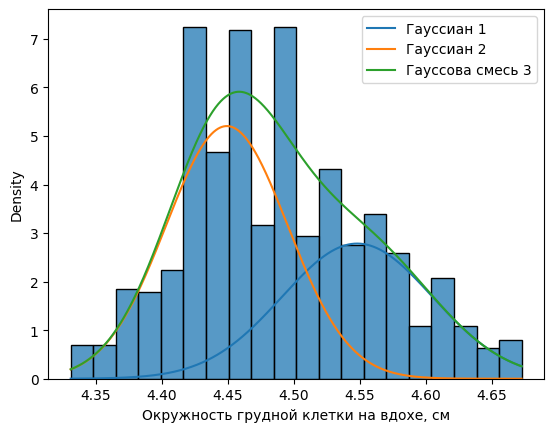

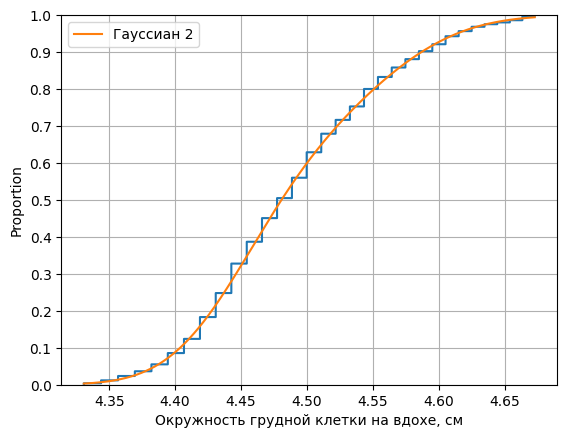

In [92]:
x = np.linspace(np.min(df_log), np.max(df_log), 2000)
gmm = GaussianMixture(n_components = 2, tol = 0.000001,)
gmm.fit(np.expand_dims(df_log, 1))
Gaussian_nr = 1
params = []
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Гауссиан {:}: mu = {:.2}, σ = {:.2}, вес = {:.2}'.format(Gaussian_nr, mu, sd, p))
    params.append((mu, sd, p, Gaussian_nr))
    g_s = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, g_s, label = 'Гауссиан {:}'.format(Gaussian_nr));
    Gaussian_nr += 1
print('Среднее логарифмическое правдоподобие =', gmm.score(np.expand_dims(df_log, 1)))
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gmm_sum, label = 'Гауссова смесь 3')
sns.histplot(df_log, bins = 20, kde = False, stat = "density")
plt.legend()
plt.show()

ax = sns.ecdfplot(df_log)
ax.axes.set_yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
ax.grid()
Y = np.zeros(2000)
for param in params:
    Y = Y + stats.norm(param[0], param[1]).cdf(x) * param[2]
plt.plot(x, Y, label = 'Гауссиан {:}'.format(param[3]))
plt.legend()
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


Гауссиан 1: mu = 4.6, σ = 0.049, вес = 0.26
Гауссиан 2: mu = 4.4, σ = 0.041, вес = 0.27
Гауссиан 3: mu = 4.5, σ = 0.047, вес = 0.48
Среднее логарифмическое правдоподобие = 1.2622648251863153


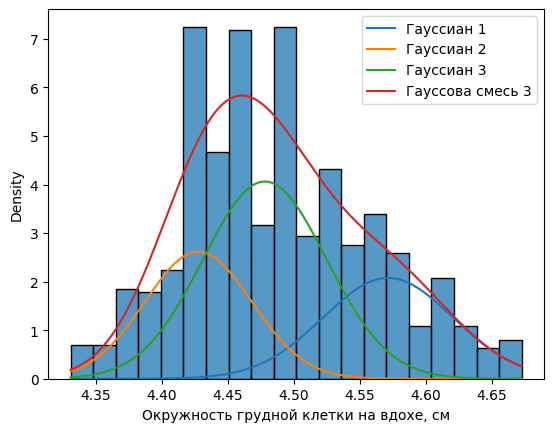

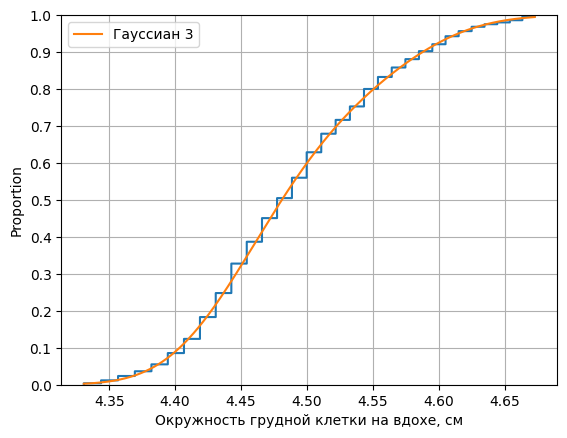

In [93]:
x = np.linspace(np.min(df_log), np.max(df_log), 2000)
gmm = GaussianMixture(n_components = 3, tol = 0.000001,)
gmm.fit(np.expand_dims(df_log, 1))
Gaussian_nr = 1
params = []
for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_):
    print('Гауссиан {:}: mu = {:.2}, σ = {:.2}, вес = {:.2}'.format(Gaussian_nr, mu, sd, p))
    params.append((mu, sd, p, Gaussian_nr))
    g_s = stats.norm(mu, sd).pdf(x) * p
    plt.plot(x, g_s, label='Гауссиан {:}'.format(Gaussian_nr));
    Gaussian_nr += 1
print('Среднее логарифмическое правдоподобие =', gmm.score(np.expand_dims(df_log, 1)))
gmm_sum = np.exp([gmm.score_samples(e.reshape(-1, 1)) for e in x])
plt.plot(x, gmm_sum, label = 'Гауссова смесь 3')
sns.histplot(df_log, bins = 20, kde = False, stat = "density")
plt.legend()
plt.show()

ax = sns.ecdfplot(df_log)
ax.axes.set_yticks(np.arange(start = 0, stop = 1.1, step = 0.1))
ax.grid()
Y = np.zeros(2000)
for param in params:
    Y = Y + stats.norm(param[0], param[1]).cdf(x) * param[2]
plt.plot(x, Y, label = 'Гауссиан {:}'.format(param[3]))
plt.legend()
plt.show()